<a href="https://colab.research.google.com/github/royarkaofficial/Handling_Diff_DT/blob/main/Copy_of_Handling_Diff_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Semi-Structured Data

In [ ]:
import pandas as pd

In [ ]:
json_data = '{"name": ["John","kiran"], "age": [30, 75], "city": ["New York", "Bengaluru"]}'

In [ ]:
print(json_data)

{"name": ["John","kiran"], "age": [30, 75], "city": ["New York", "Bengaluru"]}


In [ ]:
df = pd.read_json(json_data)

<ipython-input-12-95a751eb55eb>:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(json_data)


In [ ]:
df

,name,age,city
0,John,30,New York
1,kiran,75,Bengaluru


In [ ]:
df1 = pd.read_json('/content/Sample_Json.json')

In [ ]:
df1.head()

,name,email,address,phone,website
0,Dorcas Nienow,waelchi.betty@rodriguez.org,"68520 Jordi Lakes\nPort Willowchester, OK 72555",1-857-654-1614,https://examplefile.com
1,Matilda Mayer DDS,khalid31@gmail.com,4667 Dickinson Crescent Suite 943\nPort Ansley...,861.536.2755 x6481,https://examplefile.com
2,Dr. Osbaldo Daugherty,percy.brakus@gmail.com,"33244 Kurtis Fields\nSouth Ana, NC 85943-0622",(996) 848-4549 x718,https://examplefile.com
3,Laurianne Toy,miller.lavina@yahoo.com,"18953 Jast Views\nWest Idell, MT 49914",(483) 471-0047,https://examplefile.com
4,Carmen Herzog III,jazmyne.harris@ebert.biz,"50688 Hilda Spur Suite 143\nLilianaland, MA 02...",(436) 215-7804,https://examplefile.com


Handling Nested JSON Data

In [ ]:
import pandas as pd

In [ ]:
import json
from pandas import json_normalize

In [ ]:
# Sample JSON structure with nested data
data = {
    "employees": [
        {
            "id": 1,
            "name": "Alice",
            "department": {"name": "Engineering", "location": "Building A"},
            "projects": [
                {"name": "Project X", "duration_months": 6},
                {"name": "Project Y", "duration_months": 4}
            ]
        },
        {
            "id": 2,
            "name": "Bob",
            "department": {"name": "HR", "location": "Building B"},
            "projects": [
                {"name": "Project Z", "duration_months": 12}
            ]
        }
    ]
}

In [ ]:
data

{'employees': [{'id': 1,
   'name': 'Alice',
   'department': {'name': 'Engineering', 'location': 'Building A'},
   'projects': [{'name': 'Project X', 'duration_months': 6},
    {'name': 'Project Y', 'duration_months': 4}]},
  {'id': 2,
   'name': 'Bob',
   'department': {'name': 'HR', 'location': 'Building B'},
   'projects': [{'name': 'Project Z', 'duration_months': 12}]}]}

In [ ]:
df = json_normalize(data['employees'],
                    record_path = 'projects',
                    meta = ['id', ['department', 'name'], ['department', 'location']],
                    record_prefix='project_',
                    meta_prefix='employee_')

In [ ]:
df.head()

,project_name,project_duration_months,employee_id,employee_department.name,employee_department.location
0,Project X,6,1,Engineering,Building A
1,Project Y,4,1,Engineering,Building A
2,Project Z,12,2,HR,Building B


XML

In [ ]:
import pandas as pd

In [ ]:
import xml.etree.ElementTree as ET

In [ ]:
# Step 1: Create sample XML data and save it to a file
root = ET.Element("employees")

# Adding first employee
employee1 = ET.SubElement(root, "employee")
ET.SubElement(employee1, "id").text = "1"
ET.SubElement(employee1, "name").text = "Alice"
department1 = ET.SubElement(employee1, "department")
ET.SubElement(department1, "name").text = "Engineering"
ET.SubElement(department1, "location").text = "Building A"

# Adding second employee
employee2 = ET.SubElement(root, "employee")
ET.SubElement(employee2, "id").text = "2"
ET.SubElement(employee2, "name").text = "Bob"
department2 = ET.SubElement(employee2, "department")
ET.SubElement(department2, "name").text = "HR"
ET.SubElement(department2, "location").text = "Building B"

In [ ]:
tree = ET.ElementTree(root)
with open("employees.xml", "wb") as f:
  tree.write(f)

In [ ]:
with open("employees.xml", "rb") as f:
  data = f.read()
  print(data)

b'<employees><employee><id>1</id><name>Alice</name><department><name>Engineering</name><location>Building A</location></department></employee><employee><id>2</id><name>Bob</name><department><name>HR</name><location>Building B</location></department></employee></employees>'


In [ ]:
df = pd.read_xml("employees.xml")

In [ ]:
df.head()

,id,name,department
0,1,Alice,NaN
1,2,Bob,NaN


In [ ]:
df = pd.read_xml('/content/XML_Sample.xml')

In [ ]:
df.head()

,name,age,email,title,author,year
0,John Doe,30.0,john.doe@example.com,None,None,NaN
1,Jane Smith,25.0,jane.smith@example.com,None,None,NaN
2,None,NaN,None,The Adventure Begins,Robert Johnson,2022.0
3,John Doe,30.0,john.doe@example.com,None,None,NaN
4,Jane Smith,25.0,jane.smith@example.com,None,None,NaN


#Un-Structured Data

Handle the Images

In [ ]:
import cv2
import pandas as pd

In [ ]:
def extract_features(image):
  hog = cv2.HOGDescriptor()
  features = hog.compute(image)
  updated_features = features.flatten()
  return updated_features

In [ ]:
image_path = "/content/kgf.jpg"
image_title = "Rocky"
image = cv2.imread(image_path)

In [ ]:
image = cv2.resize(image, (64, 128))

In [ ]:
extract = extract_features(image)

In [ ]:
extract

array([0.34169072, 0.12429813, 0.04575771, ..., 0.1562428 , 0.26628265,
       0.29229787], dtype=float32)

In [ ]:
df = pd.DataFrame([extract])
df.columns = [f'feature_{i}' for i in range(df.shape[1])]
df['image_title'] = image_title




In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3771,feature_3772,feature_3773,feature_3774,feature_3775,feature_3776,feature_3777,feature_3778,feature_3779,image_title
0,0.341691,0.124298,0.045758,0.03598,0.058756,0.01322,0.043763,0.100849,0.206451,0.229408,...,0.255988,0.174857,0.140608,0.158014,0.292298,0.292298,0.156243,0.266283,0.292298,Rocky


Working with multiple images

In [ ]:

image_data = [
    ("/content/th (1).jpg", "Rose"),
    ("/content/th (3).jpg", "Sunflower"),
    ("/content/th (4).jpg", "Lotus")
]

all_feature_names = []

for image_path, title in image_data:
  image = cv2.imread(image_path)
  if image is not None:
    image = cv2.resize(image, (64, 128))
    features = extract_features(image)
    features_with_title = list(features) + [title]
    all_feature_names.append(features_with_title)

df = pd.DataFrame(all_feature_names)
df.columns = [f'feature_{i}' for i in range(df.shape[1] - 1)] + ['image_title']

In [ ]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_3771,feature_3772,feature_3773,feature_3774,feature_3775,feature_3776,feature_3777,feature_3778,feature_3779,image_title
0,0.118218,0.259309,0.259309,0.254985,0.162486,0.234820,0.191519,0.244178,0.223024,0.159787,...,0.355566,0.355566,0.340603,0.206181,0.161945,0.045712,0.015458,0.025553,0.064313,Rose
1,0.103519,0.049621,0.017546,0.055888,0.077677,0.251558,0.333023,0.236442,0.160730,0.119135,...,0.229034,0.206586,0.122610,0.124932,0.229034,0.205363,0.118243,0.034726,0.229034,Sunflower
2,0.253400,0.209042,0.108855,0.083684,0.067237,0.011441,0.058928,0.155104,0.253400,0.253400,...,0.173314,0.098276,0.166960,0.072161,0.245416,0.101899,0.245416,0.245416,0.245416,Lotus


Working of the HOG Descriptor

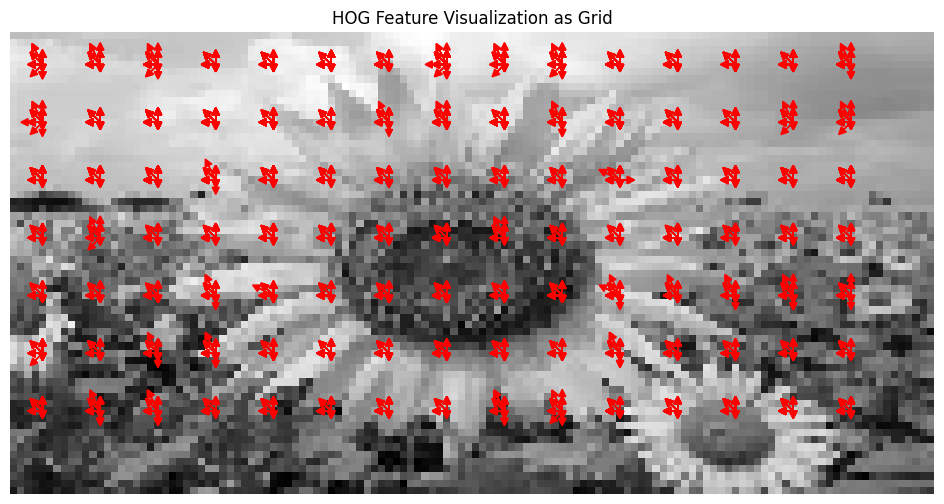

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute and visualize HOG features in a grid
def visualize_hog_grid(image_path, cell_size=8, block_size=2, nbins=9):
    # Read the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (128, 64))  # Resize for standard HOG dimensions

    # Initialize HOG descriptor with parameters
    hog = cv2.HOGDescriptor(
        _winSize=(image.shape[1] // cell_size * cell_size, image.shape[0] // cell_size * cell_size),
        _blockSize=(block_size * cell_size, block_size * cell_size),
        _blockStride=(cell_size, cell_size),
        _cellSize=(cell_size, cell_size),
        _nbins=nbins
    )

    # Compute HOG descriptors
    hog_features = hog.compute(image)

    # Calculate the number of cells along x and y
    num_cells_x = image.shape[1] // cell_size
    num_cells_y = image.shape[0] // cell_size

    # Reshape HOG features accordingly
    hog_features = hog_features.reshape((num_cells_y - block_size + 1), (num_cells_x - block_size + 1), block_size, block_size, nbins).transpose((1, 0, 2, 3, 4))

    # Initialize figure
    plt.figure(figsize=(12, 6))
    plt.imshow(image, cmap='gray')
    plt.title("HOG Feature Visualization as Grid")

    # Draw HOG features in a grid
    for y in range(num_cells_y - block_size + 1):
        for x in range(num_cells_x - block_size + 1):
            cell_hog = hog_features[x, y].ravel()
            angle_unit = 180 / nbins
            for bin_idx, magnitude in enumerate(cell_hog):
                angle = bin_idx * angle_unit
                angle_rad = np.deg2rad(angle)
                center_x = x * cell_size + cell_size // 2
                center_y = y * cell_size + cell_size // 2
                dx = magnitude * np.cos(angle_rad) * cell_size // 2
                dy = magnitude * np.sin(angle_rad) * cell_size // 2
                plt.arrow(center_x, center_y, dx, dy, color='red', head_width=1, head_length=1)

    plt.grid(visible=True, color='blue', linewidth=0.5)  # Draw grid lines
    plt.axis("off")
    plt.show()

# Path to the image
image_path = '/content/th (3).jpg'

# Call the function to visualize HOG as grid
visualize_hog_grid(image_path)

Text Feature Extraction

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv('/content/sample_sentiment_data.csv')

In [ ]:
count = CountVectorizer()
count_res = count.fit_transform(data['review'])

In [ ]:
count_df = pd.DataFrame(count_res.toarray(), columns=count.get_feature_names_out())

In [ ]:
count_df['sentiment'] = data['sentiment']

In [ ]:
count_df.head()

,absolutely,acting,all,almost,amazing,an,and,asleep,at,avoid,...,watch,watching,weak,were,work,worth,written,year,you,sentiment
0,0,1,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,negative
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,positive
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,positive
4,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,negative
